In [23]:
# 读入数据

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)

station_locations_df = pd.read_csv(
    './data/station-locations.csv',
    header=0,
    dtype={
        'station': str,
        'longitude': float,
        'latitude': float,
    }
)

passenger_flow_df = pd.read_csv(
    './data/passenger-flow.csv',
    header=0,
    parse_dates=['datetime'],
    date_parser=lambda x: datetime.strptime(x, "%Y/%m/%d %H:%M"),
    dtype={
        'ID': str,
        'passengers-in': int,
        'passengers-out': int,
        'station': str,
    }
)

passenger_flow_df['day'] = passenger_flow_df.apply(lambda row: row['datetime'].strftime('%d'), axis=1).astype(int)

     passengers-in  passengers-out
day                               
01           89553           89553
02          106890          106890
03           98175           98175
04           89815           89815
05          119204          119204
06          110510          110510
07          122495          122495
08          121978          121978
09          113252          113252
10           77984           77984
11          118952          118952
12          101863          101863
13          118966          118966
14          122422          122422


<AxesSubplot:xlabel='day'>

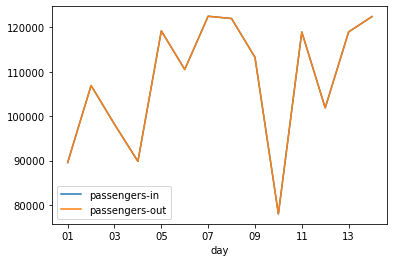

In [106]:
# 每日出入站的总客流量
#
# day  passengers-in  passengers-out
#  01          89553           89553
#  02         106890          106890
#  03          98175           98175
#  04          89815           89815
#  05         119204          119204
#  06         110510          110510
#  07         122495          122495
#  08         121978          121978
#  09         113252          113252
#  10          77984           77984
#  11         118952          118952
#  12         101863          101863
#  13         118966          118966
#  14         122422          122422

df = passenger_flow_df.copy()
df = df.groupby('day').sum()

print(df)
df.plot()

                     passengers-in  passengers-out
datetime                                          
2020-09-01 06:00:00            598             471
2020-09-01 06:15:00            568             585
2020-09-01 06:30:00            627             555
2020-09-01 06:45:00            730             696
2020-09-01 07:00:00            719             782
2020-09-01 07:15:00            793             866
2020-09-01 07:30:00            887             973
2020-09-01 07:45:00           1028            1127
2020-09-01 08:00:00           1036            1436
2020-09-01 08:15:00           1158            1778
2020-09-01 08:30:00           1015            1783
2020-09-01 08:45:00           1182            1893
2020-09-01 09:00:00           1176            1646
2020-09-01 09:15:00           1148            1752
2020-09-01 09:30:00           1230            1873
2020-09-01 09:45:00           1171            1933
2020-09-01 10:00:00           1180            1934
2020-09-01 10:15:00           1

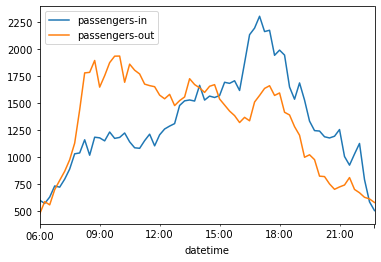

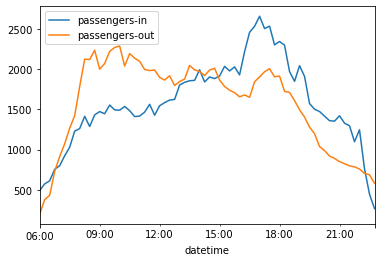

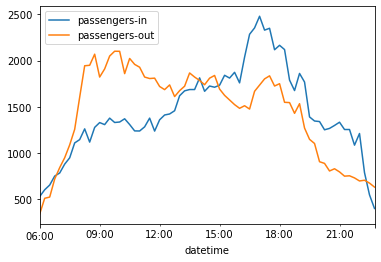

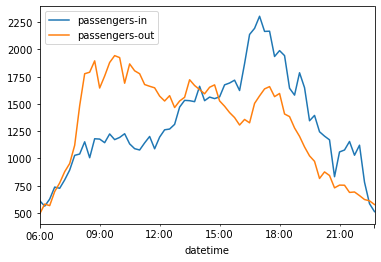

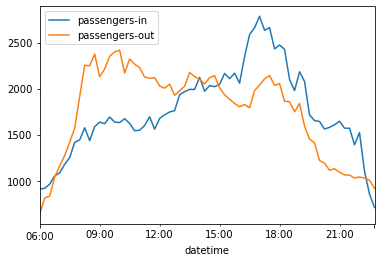

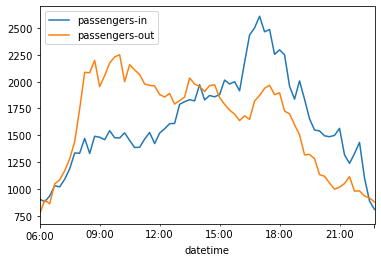

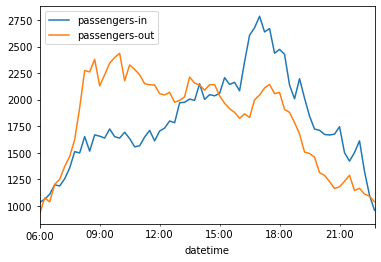

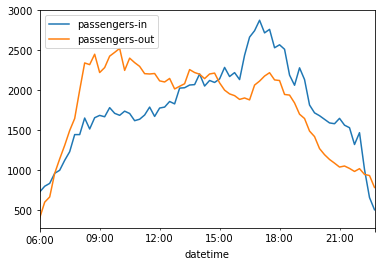

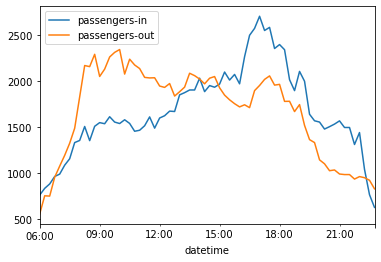

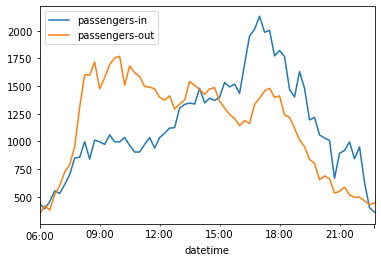

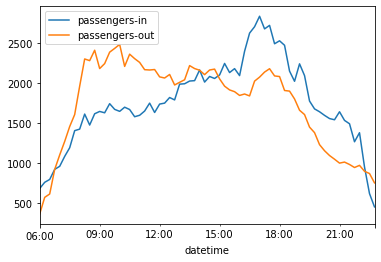

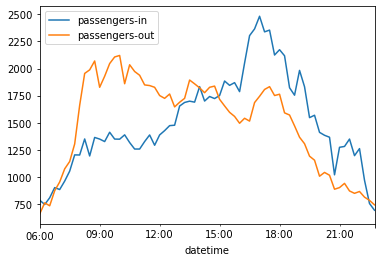

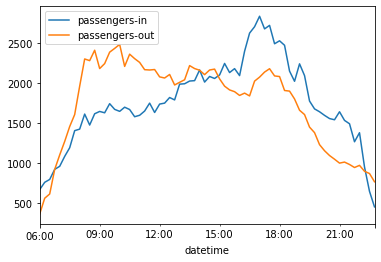

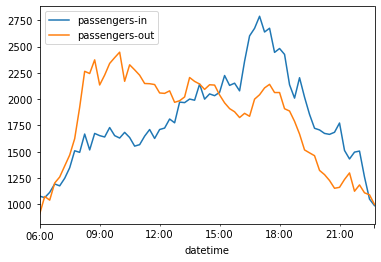

In [25]:
# 每日每时刻出入站的客流量

for day in range(1, 14 + 1):
    df = passenger_flow_df[passenger_flow_df['day'] == day]
    df = df.set_index('datetime')
    df = df.groupby('datetime').sum()
    df = df[['passengers-in', 'passengers-out']]
    print(df)
    df.plot()

In [36]:
stations_list = station_locations_df['station'].tolist()

for day in range(1, 1 + 1):
    day_df = passenger_flow_df[passenger_flow_df['day'] == day]
    for hour in range(6,22+1):
        for minute in range(0,45+1,15):
            day_station_df = day_df[day_df['datetime'] == f'2020-09-01 {hour}:{minute}:00']
            # if day_station_df.shape!=(68,6):
            print(day_station_df.shape)


(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(44, 6)
(41, 6)
